# Values text comparison
## BART model
Cycle 8. Nov 11th 2025

Methods:
- BART Zero-shot classification



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Settings
pd.set_option('display.max_colwidth', None)

### Zero-shot classification

Zero-shot classification (or inference) is a machine learning approach where a model is able to classify data into categories that it has not explicitly seen during training. This is particularly useful in scenarios where you want to apply a model to new classes without needing to retrain it on those specific classes.

Key Features of Zero-Shot Classification:
1. No Training on Specific Classes: The model is trained on a different set of classes and can generalize its understanding to new, unseen classes based on their descriptions or labels.

2. Use of Natural Language Descriptions: In zero-shot classification, you typically provide the model with candidate labels or descriptions in natural language. The model uses its understanding of language and context to determine which label best fits the input text.

3. Flexibility: This approach allows for greater flexibility in applications, as you can easily adapt the model to new tasks without the need for additional labeled data or retraining.

4. Applications: Zero-shot classification is useful in various applications, such as sentiment analysis, topic classification, and any scenario where the set of possible categories may change frequently or is not known in advance.




In [2]:
# It takes 18 min to run this code (the first time, then it is cached)

from transformers import pipeline

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
labels = ["security", "power", "achievement", "hedonism", "stimulation", "self-direction", "universalism", "benevolence", "tradition", "conformity"]

Device set to use cpu


In [3]:
# Example text
text = "I value a lot family and tradition in my life. However, I find that some traditions can be limiting and prevent personal growth."

# Candidate labels
labels = ["openness to change", "self-enhancement", "conservation", "self-transcendence"]
labels = ["security", "power", "achievement", "hedonism", "stimulation", "self-direction", "universalism", "benevolence", "tradition", "conformity"]

# Classify
result = classifier(text, candidate_labels=labels)
print(result)

{'sequence': 'I value a lot family and tradition in my life. However, I find that some traditions can be limiting and prevent personal growth.', 'labels': ['tradition', 'self-direction', 'conformity', 'achievement', 'power', 'benevolence', 'security', 'stimulation', 'universalism', 'hedonism'], 'scores': [0.2869313657283783, 0.14844021201133728, 0.1336289793252945, 0.08957742154598236, 0.08525428175926208, 0.07410415261983871, 0.06505529582500458, 0.0489589087665081, 0.04099442437291145, 0.02705494686961174]}


Example with same phrases from values

In [4]:
# Load texts
df_texts = pd.read_csv("values_texts_2.csv")
df_texts

,user_id,value_text
0,1,What matters most to me is that everyone respects each other’s personal space and boundaries. Living together doesn’t mean being together all the time — balance between connection and privacy is key.
1,2,"I care most about fairness in how we share chores and responsibilities. Everyone should contribute to keeping the space clean, organized, and functional."
2,3,"Honest and compassionate communication matters most. If something bothers someone, we talk about it directly and kindly, rather than letting small issues grow."
3,4,"For me, the most important thing is living sustainably — composting, recycling, reducing waste, and using resources thoughtfully as a group."
4,5,"What I value most is that people look out for one another — helping when someone’s sick, celebrating milestones together, and being emotionally supportive."
5,6,"It’s essential to me that the community is inclusive — welcoming people of different backgrounds, ages, and lifestyles, and learning from each other’s experiences."
6,7,Eating together regularly is what matters most to me. Shared meals create a sense of belonging and help us bond as a community.
7,8,The most important thing for me is that the place feels calm and quiet. I need an environment where people respect noise levels and personal downtime.
8,9,"I love when people bring creative energy — organizing art nights, music sessions, or garden projects that bring everyone together."
9,10,"Trust is what makes communal living work. I value honesty about finances, decision-making, and expectations so no one feels left out or taken advantage of."


In [5]:
# Run classification for all texts

texts = df_texts['value_text'].tolist()
scores = np.zeros((len(texts), len(labels)))
for i, text in enumerate(texts):
    result = classifier(text, candidate_labels=labels)
    scores[i] = result['scores']

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(scores)

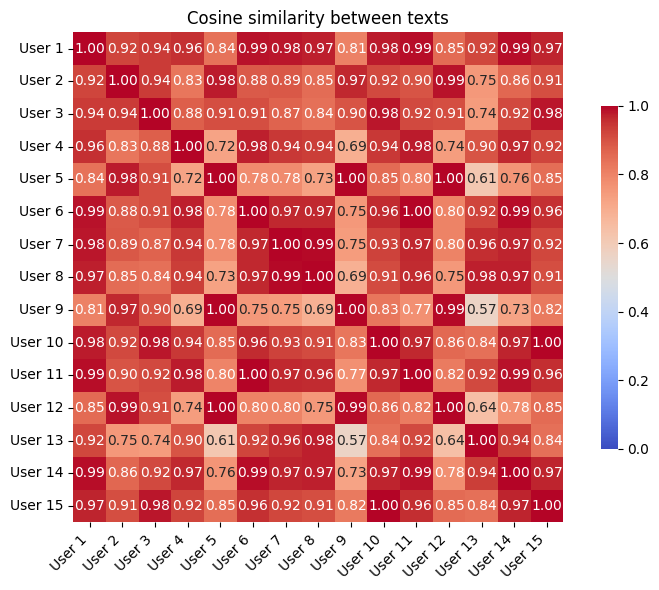

In [7]:
# Friendly row/col labels
n = cosine_sim.shape[0]
labels = [f'User {i+1}' for i in range(n)]

# Simple heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cosine_sim, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f",
            cmap="coolwarm", vmin=0, vmax=1, square=True, cbar_kws={"shrink":0.7})
plt.title("Cosine similarity between texts")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Clustering based on TF-IDF vectors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

users=range(len(texts))  # Dummy user IDs

def cluster_tfidf(scores, n_clusters=3, method='kmeans', eps=0.35, min_samples=2):
    """
    Cluster users based on TF-IDF of their 'answer' field.
    method: 'kmeans' | 'agglomerative' | 'dbscan'
    Returns: labels, model, vectorizer, tfidf_matrix
    """
    X = scores
    Xn = normalize(X)                         # normalize so cosine ~ dot product

    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42).fit(Xn)
        labels = model.labels_
    elif method == 'agglomerative':
        D = pairwise_distances(Xn, metric='cosine')
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average').fit(D)
        labels = model.labels_
    elif method == 'dbscan':
        model = DBSCAN(metric='cosine', eps=eps, min_samples=min_samples).fit(Xn)
        labels = model.labels_
    else:
        raise ValueError("Unknown method")

    sil = None
    if len(set(labels)) > 1 and -1 not in set(labels):  # silhouette needs >=2 clusters (ignore noise)
        try:
            sil = silhouette_score(Xn, labels, metric='cosine')
        except Exception:
            sil = None

    # Print assignments
    #for u, lab in zip(users, labels):
        #print(f"User {u.id} -> cluster {lab}")

    print("Silhouette (cosine):", sil)

    return labels, model, X


# Test clustering
labels, model, Xmat = cluster_tfidf(scores, n_clusters=3, method='kmeans')

Silhouette (cosine): 0.6727675696771328


/Users/alejandranavarrocastillo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandranavarrocastillo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


/Users/alejandranavarrocastillo/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette (cosine): 0.6727675696771328


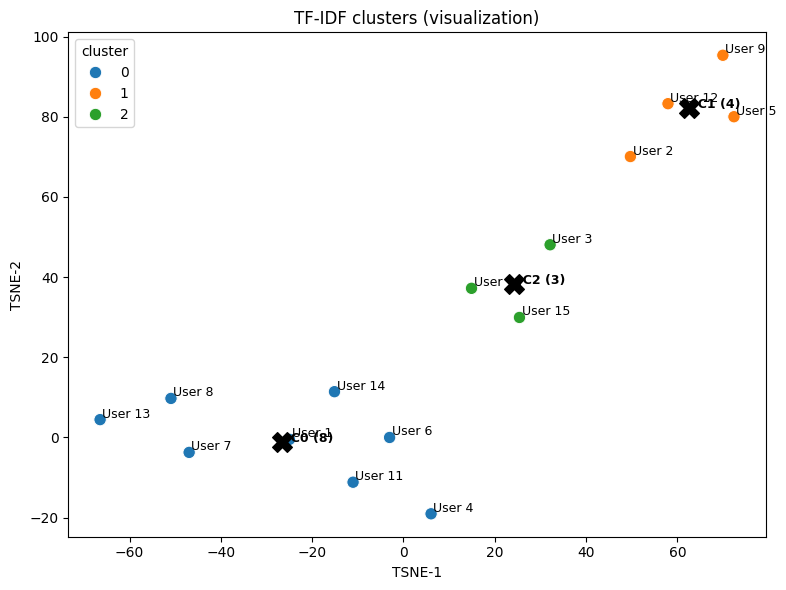

In [9]:
# New: improved cluster visualization helper
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_clusters(scores, labels, X, title='Cluster visualization'):
    """
    Produce a 2D t-SNE scatter of TF-IDF vectors colored by cluster.
    Annotates user ids and plots cluster centroids (2D mean of cluster points).
    """
    # Ensure dense array
    X_dense = X.toarray() if hasattr(X, 'toarray') else np.array(X)

    # 2D projection
    X2 = TSNE(n_components=2, random_state=42, perplexity=5, init='pca', learning_rate='auto').fit_transform(X_dense)

    labels_arr = np.array(labels)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=labels_arr, palette='tab10', legend='full', s=80)

    # Annotate points with their indices or any labels you have
    for i in range(len(X)):
        plt.text(X2[i,0] + 0.5, X2[i,1] + 0.5, f'User {i+1}', fontsize=9)


    # compute and plot 2D centroids for each cluster (ignore noise label -1)
    unique = [l for l in np.unique(labels_arr) if l != -1]
    for l in unique:
        pts = X2[labels_arr == l]
        if len(pts) == 0:
            continue
        cen = pts.mean(axis=0)
        plt.scatter(cen[0], cen[1], marker='X', s=200, color='k', edgecolor='k', linewidth=1)
        plt.text(cen[0], cen[1], f'  C{l} ({len(pts)})', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel('TSNE-1')
    plt.ylabel('TSNE-2')
    plt.legend(title='cluster')
    plt.tight_layout()
    plt.show()

# Demo: run clustering then visualize (adjust n_clusters/method as needed)
labels, model, Xmat = cluster_tfidf(scores, n_clusters=3, method='kmeans')
visualize_clusters(users, labels, Xmat, title='TF-IDF clusters (visualization)')